# WordCloud 만들기

- ## 참고 자료
    - https://ponyozzang.tistory.com/618


In [1]:
!pip install wordcloud

In [9]:
# xlrd
!pip install xlrd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import pandas as pd

## (PlayStore) 엑셀파일 로드하기

In [3]:
df_sheet_android= pd.read_excel('./playStore_review.xlsx')
df_sheet_android

내용
0                                    정말 유용하네요!
1               설치가 4번만에 되네요. 사용후에 다시 수정 예정입니다
2                         지출을 줄이기 위해 노력하고 있어요.
3     다운로드가 안되는데요?리브똑똑은 조금전에 깔았는데 이건 다운설치가 안되요
4                                     유용한 앱입니당
..                                         ...
84                                    편하고 좋습니다
85                         이전버전 보다는 깔끔하고 좋아진듯.
86                            메인에 순자산이 나와서 좋아요
87                     실물 금과은에대한 자산반영 기능이 없네요.
88  KB증권 연금저축펀드 계좌도 자산항목에 포함시키는 기능이 추가되었으면 해요.

[89 rows x 1 columns]

In [25]:
android_review_lists=list(df_sheet_android['내용'])
android_review_lists

['정말 유용하네요!',
 '설치가 4번만에 되네요. 사용후에 다시 수정 예정입니다',
 '지출을 줄이기 위해 노력하고 있어요.',
 '다운로드가 안되는데요?리브똑똑은 조금전에 깔았는데 이건 다운설치가 안되요',
 '유용한 앱입니당',
 '솔직히 많이 부족한 앱이라고 생각합니다. 여러 은행 등록가능한건 좋지만 이런 어플에는 기본이고, 사용내역 갱신 속도가 많이 개선되어야 할 것 같아요. 아무리 다른 은행 내역을 불러오는 것이라도 갱신속도가 느리다는 건 많이 아쉽네요.',
 '기본 테스트도 안하고 출시한 앱 같아요. 인증서 등록 무한반복, 지문등록 무한반복 등 오류 투성이에요. 똥개 훈련 시키는거 같아요.',
 '모바일인증서로 로그인하면 나중에 묻지도 않고 스타뱅킹 띄우고 넘어가네요. 상황에 따라 인증방법 선택하게 해주시고. 스타뱅킹 쓰던중에 마이머니 잠시 쓰려고 할때는 너무 불편.',
 'KB마이머니에 로그인 하면 KB스타알림에 스마트폰뱅킹 아이디로 로그인 했다고 알림이 뜹니다. 처음에는 스타뱅킹 해킹된 줄 알고 놀랐네요',
 '여러 곳의 금융정보를 한곳에 모아보는 것이 좋아요. 은행.증권.보험 다 연동되니까요. 그런데 요 몇일 국민은행이 조회가 안됩니다. 빠른 해결 바랍니다.',
 '이틀어 한번 꼴로 기기 오류에 업데이트 오류... 그나마 서비스는 뱅크샐러드 베껴서 그냥 저냥인데, 개발자들이 후진 것인지.... 이렇게 반복적으로 오류가 나는 업도 드물듯... 스마트 폰 사용 10년만에 최초로 앱 평가를 하게 만드는 기적의 앱... 정말 개발자들의 역량이 의심 됨..',
 '어플좀 하나로 통합하면 안될까요? 국민은행부터 카드까지 깔려있는 앱만 7개나 됩니다. 개발도 좋지만 정리좀 하는게 좋게습니다. 기능하나하나 어플만들꺼 아니잖아요.',
 '마트나 음식점에서 긁은 것도 계촤이체로 처리됨;;; 카테고리 일일히 다 설정해서 지출로 바꿔줘야됨 완전 귀찮아서 때려침',
 '앱이 20개가넘음',
 '좋아요',
 '앱이 점점 늘어난다. 줄여달란 고객 의견 무시잘함',
 

In [26]:
android_review_txt=' '.join(android_review_lists)
android_review_txt

'정말 유용하네요! 설치가 4번만에 되네요. 사용후에 다시 수정 예정입니다 지출을 줄이기 위해 노력하고 있어요. 다운로드가 안되는데요?리브똑똑은 조금전에 깔았는데 이건 다운설치가 안되요 유용한 앱입니당 솔직히 많이 부족한 앱이라고 생각합니다. 여러 은행 등록가능한건 좋지만 이런 어플에는 기본이고, 사용내역 갱신 속도가 많이 개선되어야 할 것 같아요. 아무리 다른 은행 내역을 불러오는 것이라도 갱신속도가 느리다는 건 많이 아쉽네요. 기본 테스트도 안하고 출시한 앱 같아요. 인증서 등록 무한반복, 지문등록 무한반복 등 오류 투성이에요. 똥개 훈련 시키는거 같아요. 모바일인증서로 로그인하면 나중에 묻지도 않고 스타뱅킹 띄우고 넘어가네요. 상황에 따라 인증방법 선택하게 해주시고. 스타뱅킹 쓰던중에 마이머니 잠시 쓰려고 할때는 너무 불편. KB마이머니에 로그인 하면 KB스타알림에 스마트폰뱅킹 아이디로 로그인 했다고 알림이 뜹니다. 처음에는 스타뱅킹 해킹된 줄 알고 놀랐네요 여러 곳의 금융정보를 한곳에 모아보는 것이 좋아요. 은행.증권.보험 다 연동되니까요. 그런데 요 몇일 국민은행이 조회가 안됩니다. 빠른 해결 바랍니다. 이틀어 한번 꼴로 기기 오류에 업데이트 오류... 그나마 서비스는 뱅크샐러드 베껴서 그냥 저냥인데, 개발자들이 후진 것인지.... 이렇게 반복적으로 오류가 나는 업도 드물듯... 스마트 폰 사용 10년만에 최초로 앱 평가를 하게 만드는 기적의 앱... 정말 개발자들의 역량이 의심 됨.. 어플좀 하나로 통합하면 안될까요? 국민은행부터 카드까지 깔려있는 앱만 7개나 됩니다. 개발도 좋지만 정리좀 하는게 좋게습니다. 기능하나하나 어플만들꺼 아니잖아요. 마트나 음식점에서 긁은 것도 계촤이체로 처리됨;;; 카테고리 일일히 다 설정해서 지출로 바꿔줘야됨 완전 귀찮아서 때려침 앱이 20개가넘음 좋아요 앱이 점점 늘어난다. 줄여달란 고객 의견 무시잘함 잘 사용하고 있었는데 이번 10월9일 업데이트 하더니 왜 국민은행 계좌를 연동못하죠? 가끔 로그인라면 국민은행으로 

## (PlayStore) wordCloud 만들기

In [29]:
?WordCloud

In [30]:
stopwords= set(STOPWORDS)

wordcloud_android= WordCloud(font_path="./NanumGothic.ttf",stopwords=stopwords,
                             min_font_size=1, max_font_size=50, max_words=2000, background_color='black', repeat=True).generate(android_review_txt)
wordcloud_android.words_

{'좋아요': 1.0,
 '한눈에': 0.7,
 '같아요': 0.6,
 '국민은행': 0.6,
 '많이': 0.5,
 '로그인': 0.5,
 '오류가': 0.5,
 '카테고리': 0.5,
 '어떻게': 0.5,
 '지출': 0.5,
 '나의': 0.5,
 '다른': 0.4,
 '오류': 0.4,
 '너무': 0.4,
 '업데이트': 0.4,
 '앱을': 0.4,
 '계속': 0.4,
 '자산을': 0.4,
 '정말': 0.3,
 '여러': 0.3,
 '은행': 0.3,
 '이런': 0.3,
 '스타뱅킹': 0.3,
 '그런데': 0.3,
 '하나로': 0.3,
 '지출로': 0.3,
 '앱이': 0.3,
 '계좌': 0.3,
 '이게': 0.3,
 '어플': 0.3,
 '내가': 0.3,
 '자산관리': 0.3,
 '오픈뱅킹': 0.3,
 '눈에': 0.3,
 '되네요': 0.2,
 '위해': 0.2,
 '좋지만': 0.2,
 '내역을': 0.2,
 '안하고': 0.2,
 '인증서': 0.2,
 '무한반복': 0.2,
 '않고': 0.2,
 '하면': 0.2,
 '보험': 0.2,
 '안됩니다': 0.2,
 '뱅크샐러드': 0.2,
 '사용': 0.2,
 '하게': 0.2,
 '카드까지': 0.2,
 '완전': 0.2,
 '사용하고': 0.2,
 '계좌를': 0.2,
 '그래도': 0.2,
 '도대체': 0.2,
 '어떤날은': 0.2,
 '믿고': 0.2,
 '쓰냐': 0.2,
 '너무너무': 0.2,
 '나네요': 0.2,
 '오류나는': 0.2,
 '취준생': 0.2,
 '제발': 0.2,
 '전혀': 0.2,
 '없고': 0.2,
 '자주': 0.2,
 '흩어진': 0.2,
 '어플도': 0.2,
 '있는': 0.2,
 '불편합니다': 0.2,
 '기능': 0.2,
 '매일': 0.2,
 '카테고리별': 0.2,
 '아주': 0.2,
 '누르면': 0.2,
 '사용하기': 0.2,
 '없네요': 0.2,
 '자산이': 0.2,
 '나와서': 0.2,
 

In [13]:
?plt.imshow

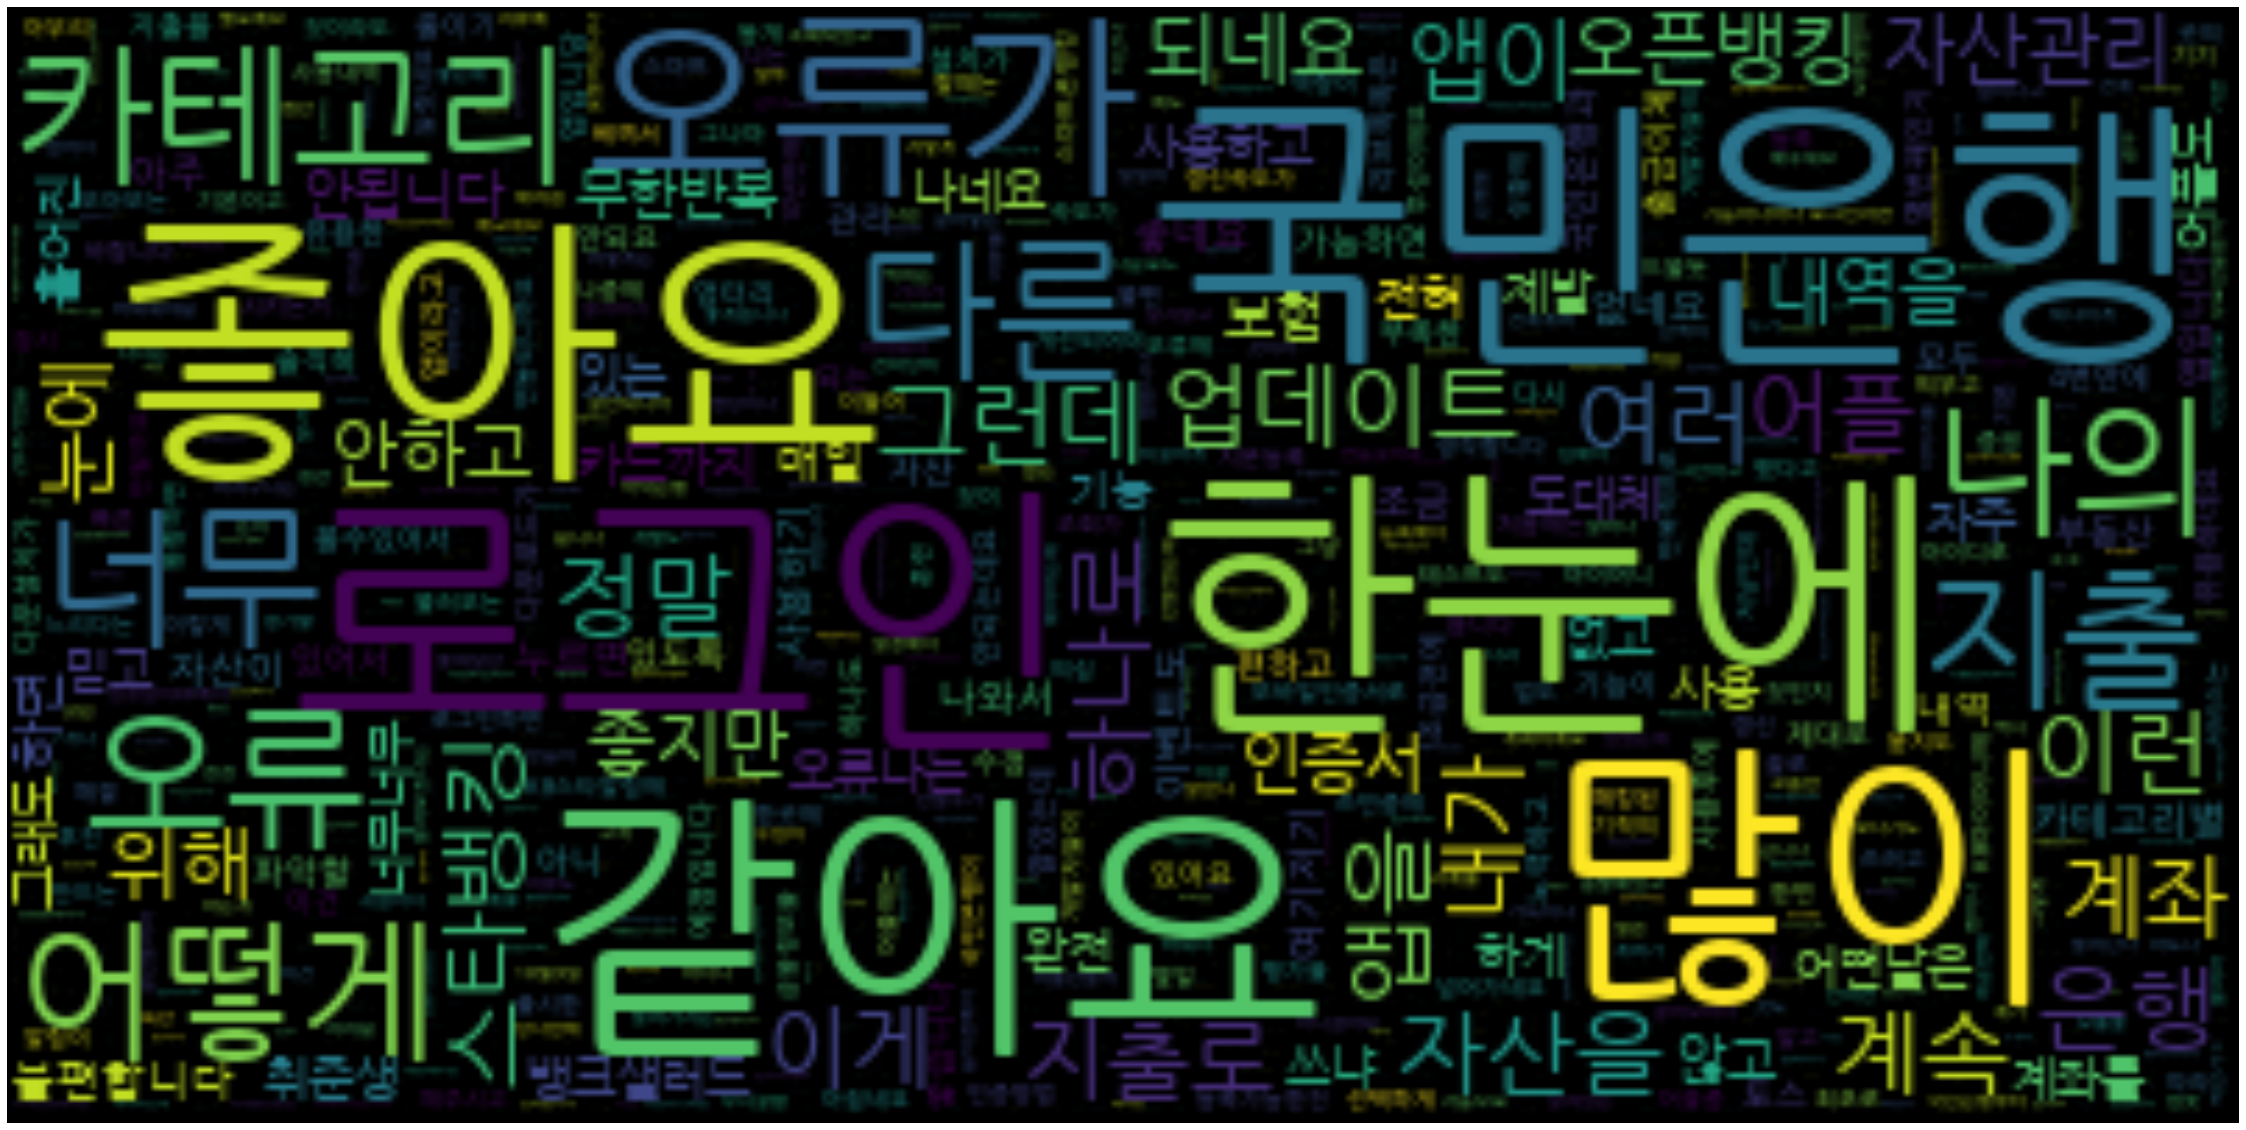

In [31]:
plt.figure(figsize=(40,40))
plt.imshow(wordcloud_android, interpolation='bilinear')
plt.axis('off')
plt.show()

# WordCloud 한번에 만들어보기

In [53]:
#한번에 만들어보기

import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import pandas as pd
import numpy as np
import os

def getImageColors(maskImgPath):
    maskMatrix= np.array(Image.open(maskImgPath))
    return maskMatrix

def makeWordClouds(imageMatrix, inputFilePath):
    df_sheet= pd.read_excel(inputFilePath)
    review_lists=list(df_sheet['내용'])
    review_txt=' '.join(review_lists)
    
    #word cloud를 만든다.
    wc= WordCloud(font_path="./NanumGothic.ttf",
                  min_font_size=1,
                  max_font_size=45, 
                  max_words=2000,
                  background_color='white',
                  mask=imageMatrix)
    
    wc.generate(review_txt)
    f=plt.figure(figsize=(30,30))
    
    plt.imshow(wc.recolor(color_func=ImageColorGenerator(imageMatrix)),
               interpolation='bilinear')
    plt.axis('off')
    plt.show()

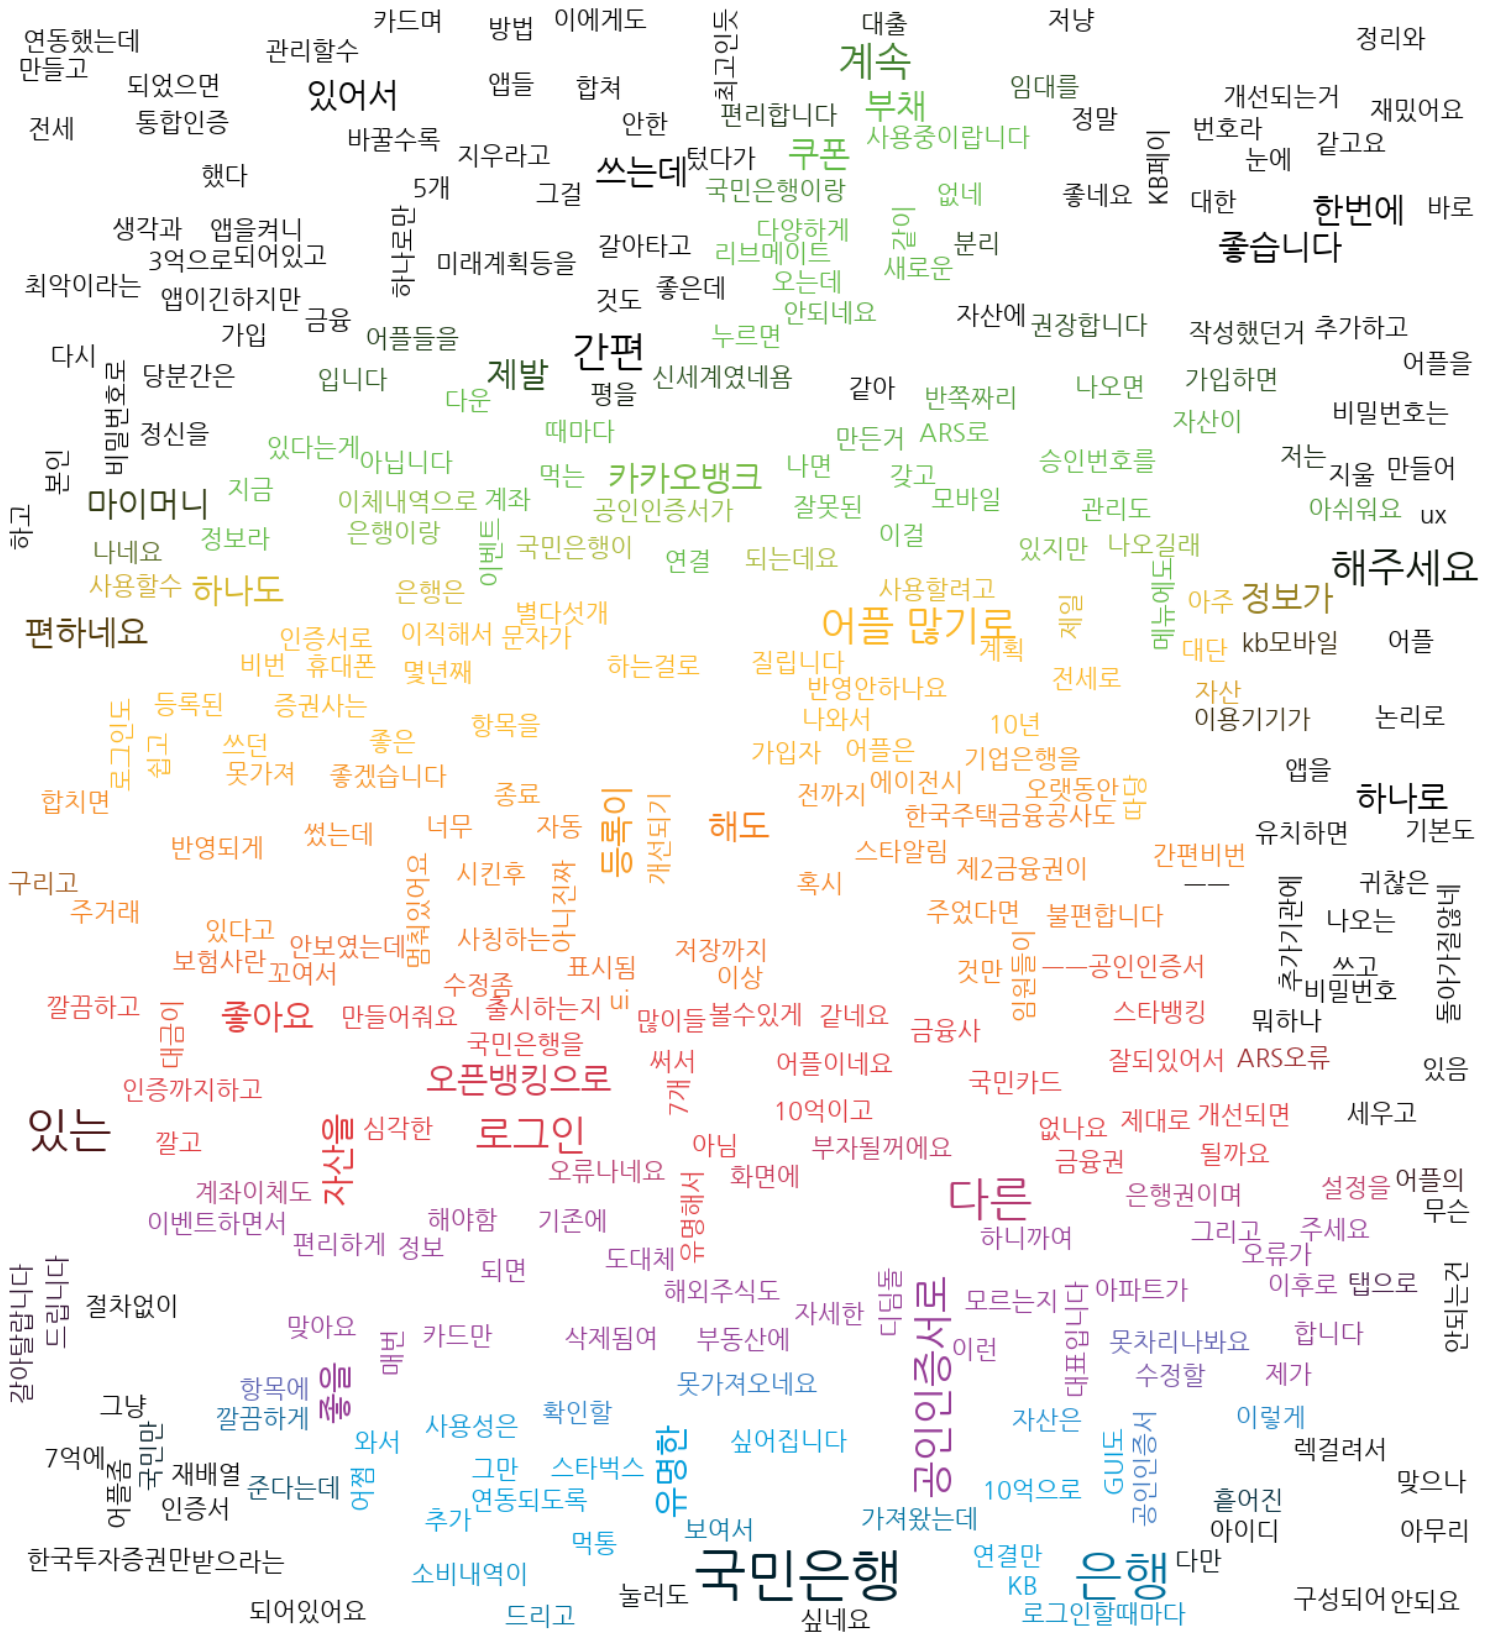

In [60]:
imageMatrix= getImageColors(r'./apple_logo.png')
makeWordClouds(imageMatrix, r'appStore_review.xlsx')

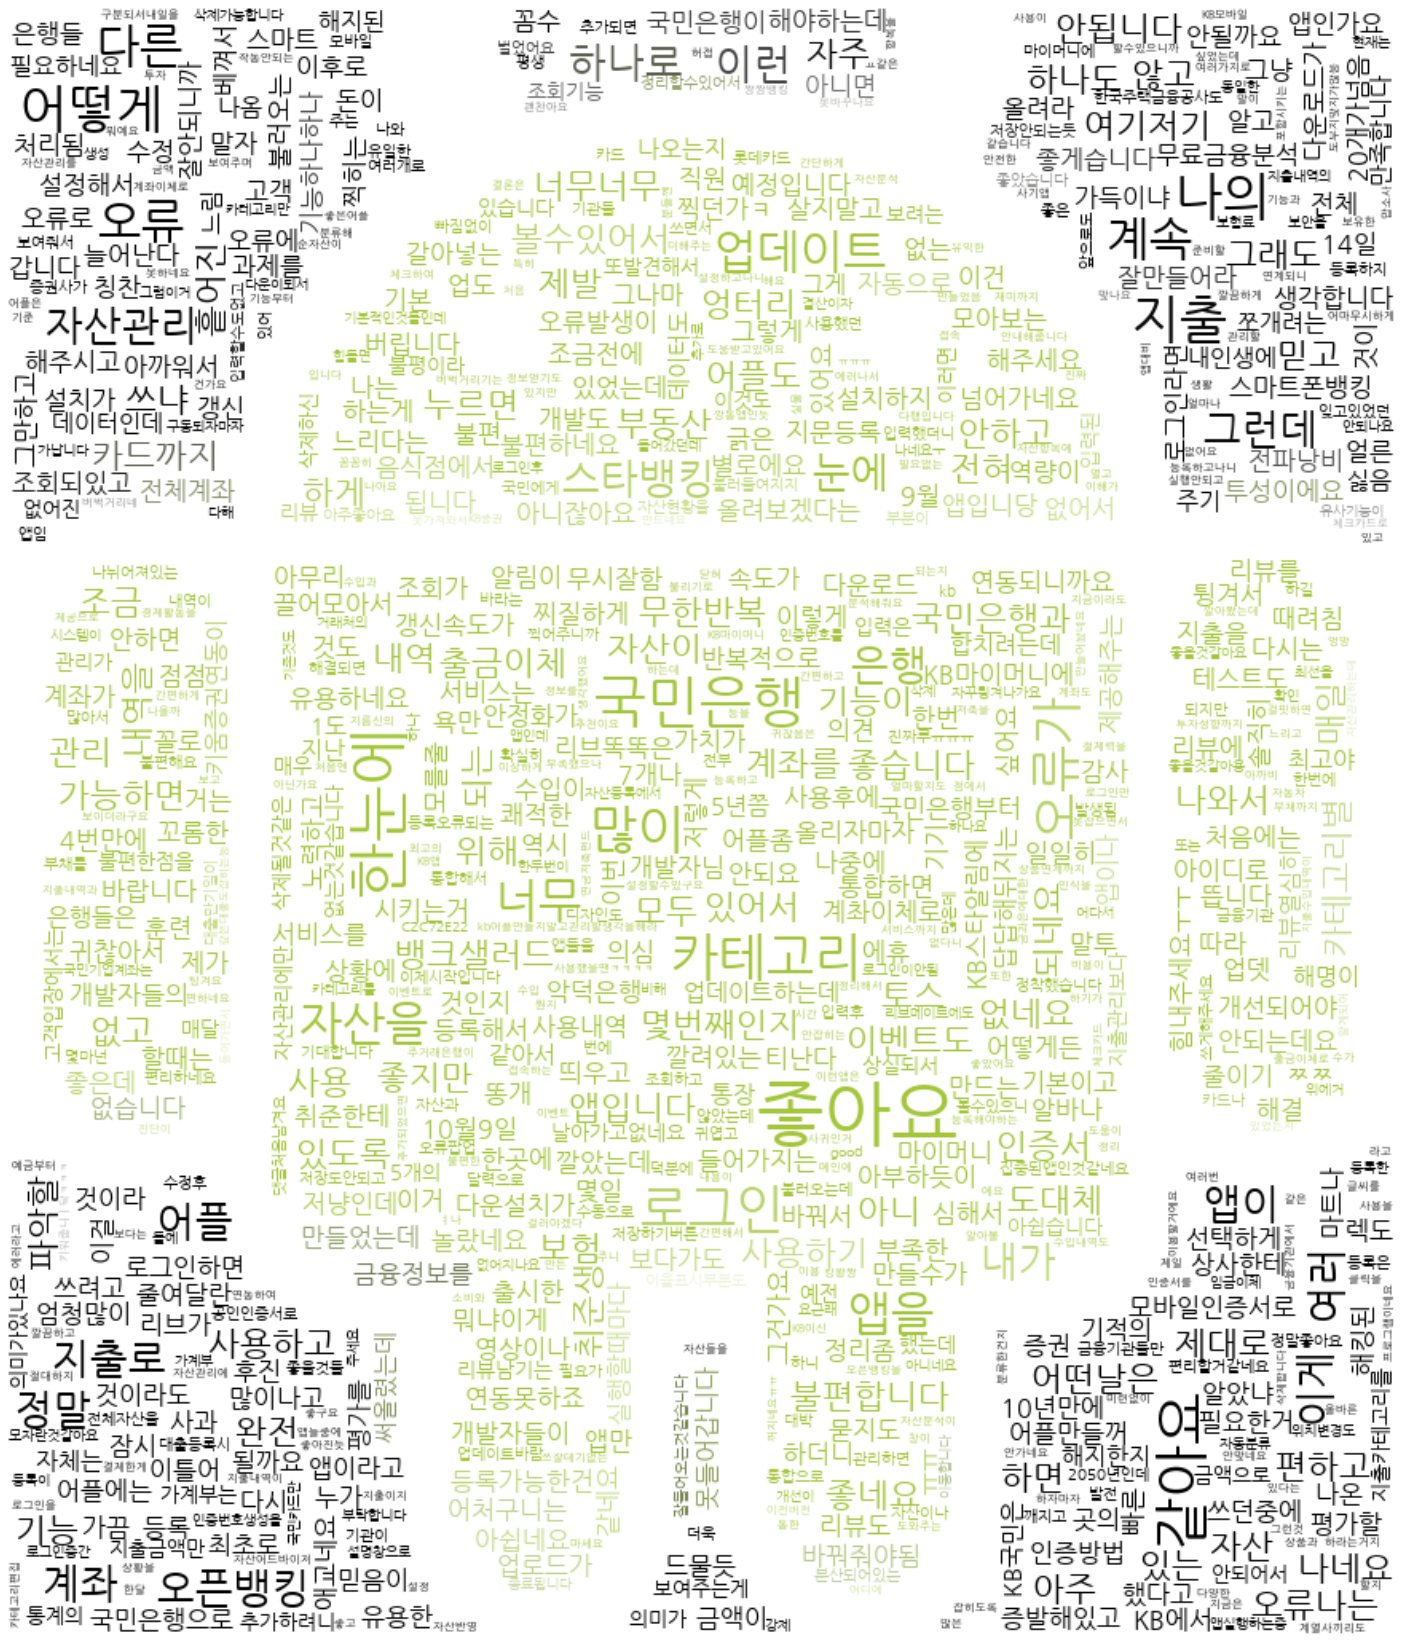

In [59]:
imageMatrix2= getImageColors(r'./android_logo.png')
makeWordClouds(imageMatrix2, r'playStore_review.xlsx')